In [1]:
# Basic libraries
import numpy as np
import pandas as pd

# Visualization library
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

# Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep learning libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
import keras
from keras.layers.core import Dense, Activation, Dropout
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier


In [2]:
fashion_train=pd.read_csv("fashion-mnist_train.csv.zip")
fashion_test=pd.read_csv("fashion-mnist_test.csv.zip")

In [3]:
fashion_train.shape

(60000, 785)

In [4]:
x_train_fashion= fashion_train.drop('label',axis=1)
y_train_fashion= fashion_train['label']
x_test_fashion = fashion_test.drop('label',axis=1)
y_test_fashion = fashion_test['label']

In [5]:
#Reshaping the dataset
x_train_reshape = x_train_fashion.values.reshape(-1,28,28)
x_test_reshape = x_test_fashion.values.reshape(-1,28,28)

In [6]:
#Name of clothing accessories in order
col_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

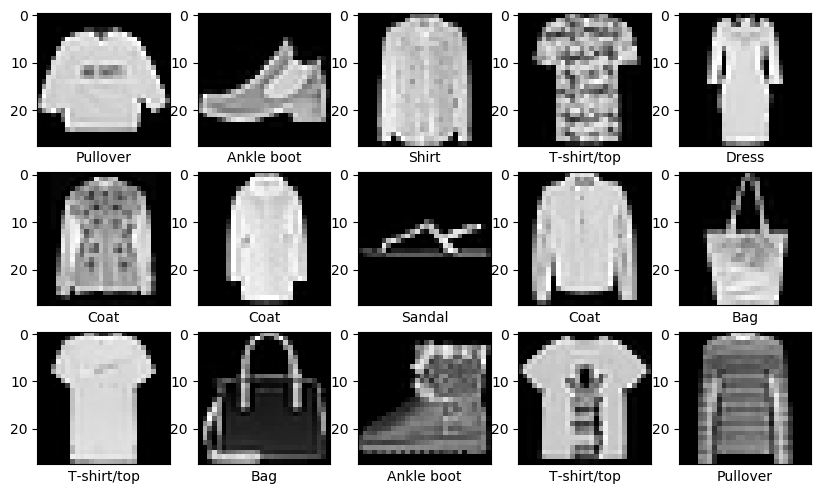

In [7]:
#visualizing the images
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.imshow(x_train_reshape[i],cmap='gray')
    plt.xlabel(col_names[y_train_fashion[i]])
plt.show()    

In [8]:
y_train_fashion = to_categorical(y_train_fashion,num_classes=10)
y_test_fashion = to_categorical(y_test_fashion,num_classes=10)

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

# Creating base neural network
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dropout(0.3),
    BatchNormalization(),
    Dense(24, activation='relu'),
    Dropout(0.3),
    BatchNormalization(),
    Dense(24, activation='relu'),
    Dropout(0.3),
    BatchNormalization(),
    Dense(10, activation='softmax'), 
])

# Compiling the model
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

# Fitting the model
history = model.fit(x_train_fashion, y_train_fashion, batch_size=100, epochs=10, validation_data=(x_test_fashion, y_test_fashion))


Epoch 1/10
600/600 [==============================] - 6s 6ms/step - loss: 1.1002 - accuracy: 0.6340 - val_loss: 0.5480 - val_accuracy: 0.8191
Epoch 2/10
600/600 [==============================] - 3s 4ms/step - loss: 0.7332 - accuracy: 0.7501 - val_loss: 0.4749 - val_accuracy: 0.8426
Epoch 3/10
600/600 [==============================] - 3s 4ms/step - loss: 0.6564 - accuracy: 0.7783 - val_loss: 0.4625 - val_accuracy: 0.8395
Epoch 4/10
600/600 [==============================] - 3s 4ms/step - loss: 0.6247 - accuracy: 0.7903 - val_loss: 0.4192 - val_accuracy: 0.8561
Epoch 5/10
600/600 [==============================] - 3s 4ms/step - loss: 0.5991 - accuracy: 0.8024 - val_loss: 0.4395 - val_accuracy: 0.8514
Epoch 6/10
600/600 [==============================] - 3s 4ms/step - loss: 0.5806 - accuracy: 0.8071 - val_loss: 0.4567 - val_accuracy: 0.8545
Epoch 7/10
600/600 [==============================] - 3s 5ms/step - loss: 0.5681 - accuracy: 0.8126 - val_loss: 0.4248 - val_accuracy: 0.8663
Epoch 

In [10]:
test_loss_fashion,test_acc_fashion = model.evaluate(x_test_fashion,y_test_fashion)

313/313 [==============================] - 1s 2ms/step - loss: 0.4424 - accuracy: 0.8560


In [11]:
print('Fashion MNIST Test accuracy:',round(test_acc_fashion,4))

Fashion MNIST Test accuracy: 0.856


In [12]:
#predicting the labels-fashion
y_predict_fash = model.predict(x_test_fashion)
y_predict_fash=np.argmax(y_predict_fash,axis=1)
y_test_fash_eval=np.argmax(y_test_fashion,axis=1)

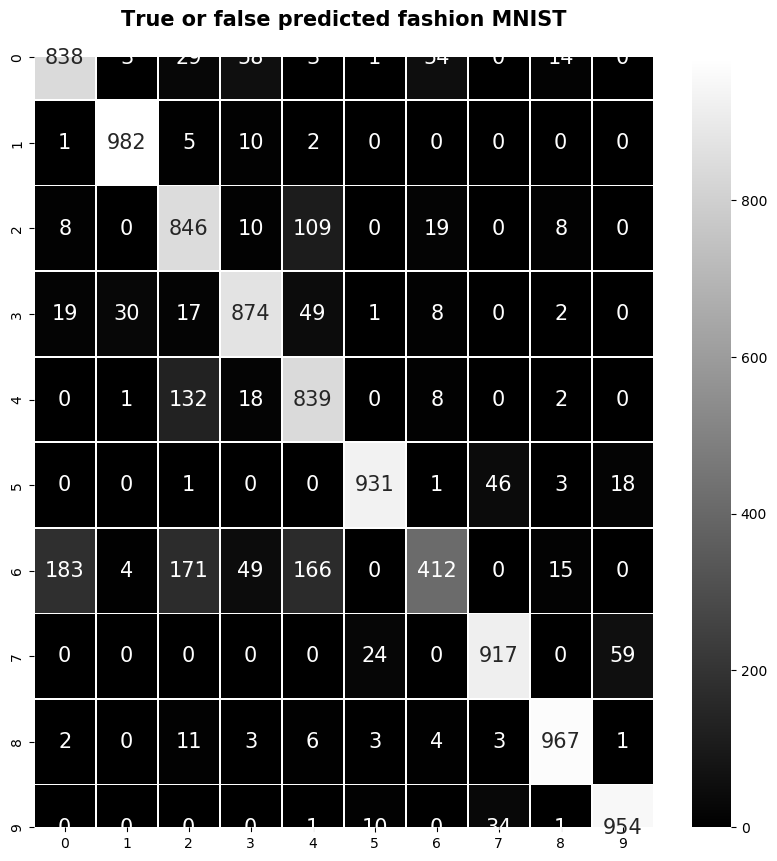

In [13]:
# Assuming y_test_fashion is one-hot encoded
y_true_labels = np.argmax(y_test_fashion, axis=1)
y_pred_probs = model.predict(x_test_fashion)
y_pred_labels = np.argmax(y_pred_probs, axis=1)

con_mat = confusion_matrix(y_true_labels, y_pred_labels)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10, 10))
sns.heatmap(con_mat, annot=True, annot_kws={'size': 15}, linewidths=0.5, fmt="d", cmap="gray")
plt.title('True or false predicted fashion MNIST\n', fontweight='bold', fontsize=15)
plt.show()

In [14]:
from sklearn.metrics import classification_report

print(classification_report(y_test_fash_eval,y_predict_fash))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1000
           1       0.96      0.98      0.97      1000
           2       0.70      0.85      0.76      1000
           3       0.86      0.87      0.86      1000
           4       0.71      0.84      0.77      1000
           5       0.96      0.93      0.95      1000
           6       0.81      0.41      0.55      1000
           7       0.92      0.92      0.92      1000
           8       0.96      0.97      0.96      1000
           9       0.92      0.95      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.85     10000
weighted avg       0.86      0.86      0.85     10000



In [15]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


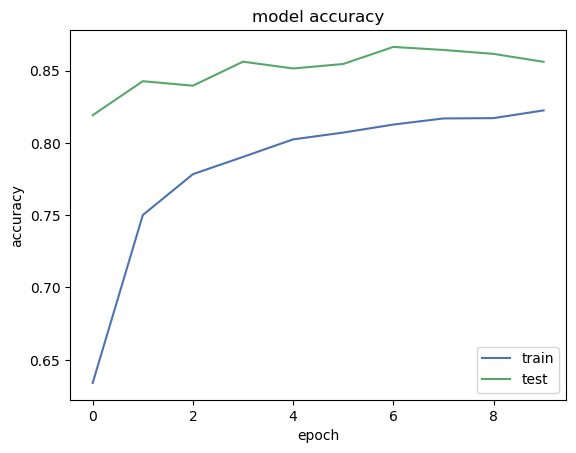

In [21]:
#summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='best')
plt.show()

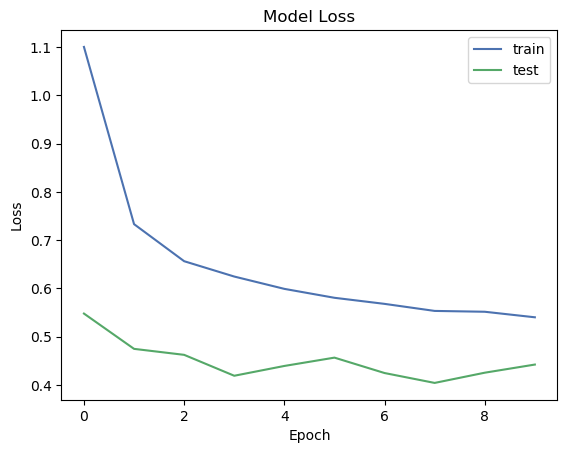

In [22]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='best')
plt.show()


In [23]:
import numpy as np
#tf.expand_dims(x_test_digit[0])
# Assuming x_test_fashion is a DataFrame
y_predict = model.predict(x_test_fashion.loc[[0], :].values)
y_predict = np.argmax(y_predict, axis=1) #here we get the index of minimum value in the encoded vector

y_test_digit_eval = np.argmax(y_test_fashion, axis=1)


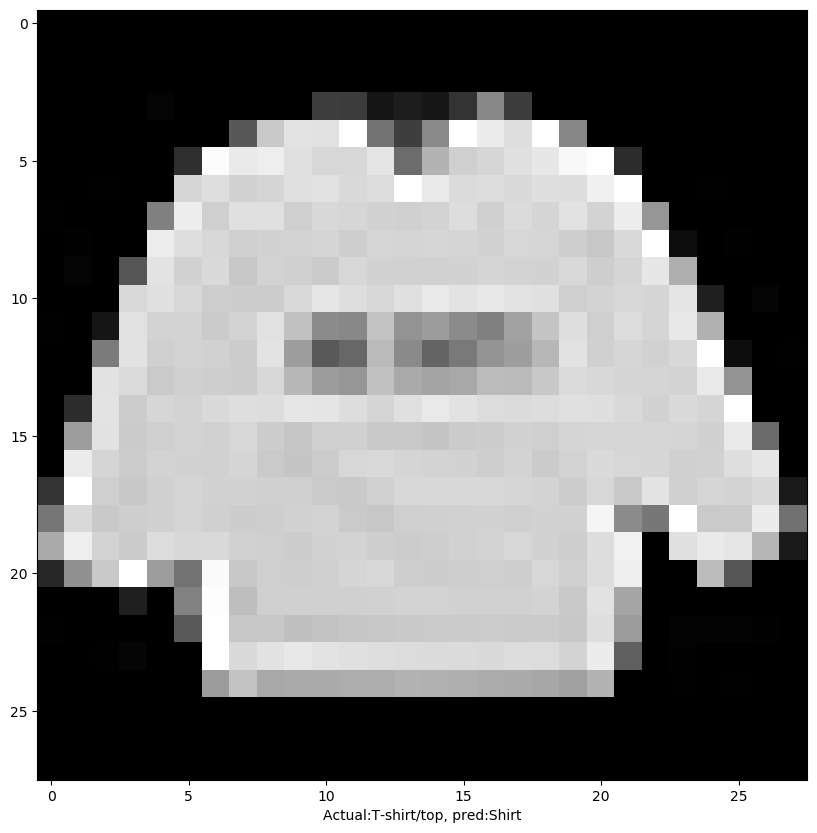

In [30]:
# Names of clothing accessories in order
col_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Visualizing the images
plt.figure(figsize=(10, 10))
plt.imshow(x_train_reshape[0], cmap='gray')
plt.xlabel("Actual:{}, pred:{}".format(col_names[np.argmax(y_test_fashion[0])], col_names[y_predict[0]]))
plt.show()
